In [ ]:
# Importing essential libraries
import numpy as np
import pandas as pd
import math
from google.colab import drive
drive.mount('/content/drive')
%pip install nltk
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.util import ngrams, bigrams, trigrams
from nltk.probability import FreqDist

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Loading the dataset
df = pd.read_csv("/content/drive/MyDrive/Spam_SMS_Dataset.txt", sep='\t', names=['label', 'message'])
ill_df = pd.read_csv("/content/drive/MyDrive/names_data.csv")
dialogue_string = open("/content/drive/MyDrive/dialogue_data.txt", "r", encoding="utf-8")

# **Exploratory Data Analysis (EDA) for Clean Dataset**
* Exploring total number of word and sentences
* Exploring unique number of word
* Plotting frequncy distribution for unigram and bigram

In [ ]:
count = 0
N = 10000
text = ""

for line in dialogue_string:
    text += line
    count = count + 1
    if count == N: break

senToken = sent_tokenize(text)
wordToken = word_tokenize(text)

tokens = ngrams(wordToken,1)
fd_uni = FreqDist(tokens)

Bigram = list(nltk.bigrams(wordToken))
fd_bi = FreqDist(bigrams(wordToken)) 

In [ ]:
#Total number of words 
print(len(wordToken))

139538


In [ ]:
#Total number of unique words
print(fd_uni.B())

10563


In [ ]:
#Total number of sentences
print(len(senToken))

15944


In [ ]:
#5 most occured word
print(fd_uni.most_common(5))

[(('.',), 10678), ((',',), 5500), (('I',), 4424), (('you',), 3710), (('?',), 3646)]


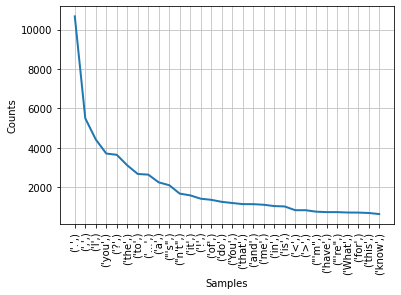

In [ ]:
#Plotting frequency distribution for unigram
fd_uni.plot(30,cumulative=False)

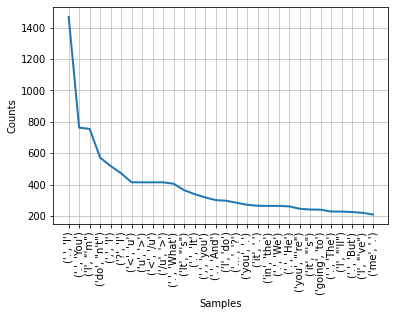

In [ ]:
#Plotting frequency distribution for bigram
fd_bi.plot(30,cumulative=False)

# **Exploratory Data Analysis (EDA)**
* Exploring NaN values in dataset
* Plotting countplots for Spam vs. Ham



In [ ]:
df.shape

(5572, 2)

In [ ]:
df.columns

Index(['label', 'message'], dtype='object')

In [ ]:
df.dtypes

label      object
message    object
dtype: object

In [ ]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.tail()

,label,message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.describe(include='object')

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


_**Note: No NaN values** in the dataset._

In [ ]:
# Mapping values for label
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [ ]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.tail()

,label,message
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...
5571,0,Rofl. Its true to its name


In [ ]:
# Importing essential libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

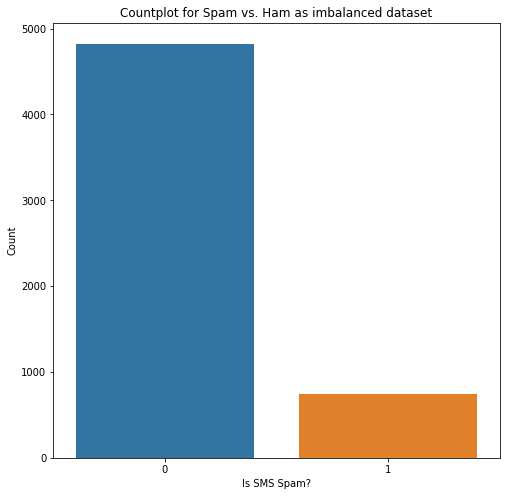

In [ ]:
# Countplot for Spam vs. Ham as imbalanced dataset
plt.figure(figsize=(8,8))
g = sns.countplot(x='label', data=df)
p = plt.title('Countplot for Spam vs. Ham as imbalanced dataset')
p = plt.xlabel('Is SMS Spam?')
p = plt.ylabel('Count')

_**Insight:** From the above countplot, it is evident that the **dataset is imbalanced**._

# **Dictionary & Bigram**

In [ ]:
text=""
for i in senToken:
  temp=word_tokenize(i)
  for j in temp: 
    if (len(j)==1 and j.lower()!='i' and j.lower()!='a'):
      continue
    if (j!='\n' and j!='.' and j!='!' and j!='-' and j!='"' and j!=','):
        text += j.lower()
        text += ' '
  text += '<unk>'

wordToken = word_tokenize(text)

tokens = ngrams(wordToken,1)
fd_uni = FreqDist(tokens)

Bigram = list(nltk.bigrams(wordToken))
fd_bi = FreqDist(bigrams(wordToken)) 

vocab = []
for i in fd_uni.items():
  vocab.append(i[0][0])

In [ ]:
def bi_prob(w1,w2):
  bg = tuple((w1,w2))
  num = 0
  if (bg in fd_bi):
    num = fd_bi[bg]
  else:
    return 0
  if(w1 not in fd_uni):
    return 0
  else : return num/fd_uni[w1]

In [ ]:
vocab

['Colonel',
 'Durnford',
 '...',
 'William',
 'Vereker',
 '<',
 'unk',
 '>',
 'I',
 'hear',
 'you',
 "'ve",
 'been',
 'seeking',
 'Officers',
 'Good',
 'ones',
 'yes',
 'Mr',
 'Gentlemen',
 'who',
 'can',
 'ride',
 'and',
 'shoot',
 'Your',
 'orders',
 "'m",
 'to',
 'take',
 'the',
 'Sikali',
 'with',
 'main',
 'column',
 'river',
 'Lord',
 'Chelmsford',
 'seems',
 'want',
 'me',
 'stay',
 'back',
 'my',
 'Basutos',
 'think',
 'wants',
 'a',
 'good',
 'man',
 'on',
 'border',
 'Why',
 'he',
 'fears',
 'flanking',
 'attack',
 'requires',
 'steady',
 'Commander',
 'in',
 'reserve',
 'Well',
 'assure',
 'Sir',
 'have',
 'no',
 'desire',
 'create',
 'difficulties',
 '45',
 'And',
 'do',
 'not',
 'In',
 'fact',
 "'d",
 'be',
 'obliged',
 'for',
 'your',
 'best',
 'advice',
 'What',
 'scouts',
 'seen',
 'So',
 'far',
 'only',
 'their',
 'But',
 'we',
 'had',
 'reports',
 'of',
 'small',
 'Impi',
 'farther',
 'north',
 'over',
 'there',
 'Lighting',
 'COGHILL',
 'cigar',
 'Our',
 'Dumford',
 

# **Edit Distance**

In [ ]:
def editDistance(str1, str2):
 
    len1 = len(str1)
    len2 = len(str2)

    DP = [[0 for i in range(len1 + 1)]
             for j in range(2)];
 
    for i in range(0, len1 + 1):
        DP[0][i] = i
 
    for i in range(1, len2 + 1):
        for j in range(0, len1 + 1):

            if (j == 0):
                DP[i % 2][j] = i
            elif(str1[j - 1] == str2[i-1]):
                DP[i % 2][j] = DP[(i - 1) % 2][j - 1]
            else:
                DP[i % 2][j] = (1 + min(DP[(i - 1) % 2][j], min(DP[i % 2][j - 1], DP[(i - 1) % 2][j - 1])))
             
    return DP[len2 % 2][len1]

# **Double Metaphone**

In [ ]:
!pip install git+https://github.com/oubiwann/metaphone.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/oubiwann/metaphone.git to /tmp/pip-req-build-rsyl59ao
  Running command git clone -q https://github.com/oubiwann/metaphone.git /tmp/pip-req-build-rsyl59ao


In [ ]:

# -*- coding: utf-8 -*-
from metaphone import doublemetaphone
from enum import Enum

class Threshold(Enum):
    WEAK = 0
    NORMAL = 1
    STRONG = 2

def double_metaphone(value):
    print(doublemetaphone(value))
    return doublemetaphone(value)

#(Primary Key = Primary Key) = Strongest Match
#(Secondary Key = Primary Key) = Normal Match
#(Primary Key = Secondary Key) = Normal Match
#(Alternate Key = Alternate Key) = Minimal Match
def double_metaphone_compare(tuple1,tuple2,threshold):
    if threshold == Threshold.WEAK:
        if tuple1[1] == tuple2[1]:
            return True
    elif threshold == Threshold.NORMAL:
        if tuple1[0] == tuple2[1] or tuple1[1] == tuple2[0]:
            return True
    else:
        if tuple1[0] == tuple2[0]:
            return True
    return False

In [ ]:
def phonetic_edit_dist(s1,s2):
  t1=doublemetaphone(s1)
  t2=doublemetaphone(s2)
  return editDistance(t1[0],t2[0])

In [ ]:
def phonetic_dist_check(s1,s2,threshold):
  dist=phonetic_edit_dist(s1,s2)
  if dist<=threshold:
    return True
  else: 
    return False

In [ ]:
ts1="u"
ts2="you"
double_metaphone(ts1)
double_metaphone(ts2)
print(phonetic_edit_dist(ts1,ts2))
print(phonetic_dist_check(ts1,ts2,2))
double_metaphone_compare(doublemetaphone(ts1),doublemetaphone(ts2),Threshold.WEAK)

('A', '')
('A', '')
0
True


True


# **Noise Cleaning**

In [ ]:
def reduce_letter_repetition(word1):
  i = 0
  j = 0
  new_word = ""
  while(j <= len(word1)):
    if(j < len(word1) and word1[i] == word1[j]):
      j= j + 1
    elif(j-i <=3):
      while(1):
        if(i == j):
          break
        new_word += word1[i]
        i = i+1
      j = j +1
    else:
      new_word += word1[i] + word1[i] + word1[i]
      i=j
      j = j + 1
      
  return new_word
#checking
reduce_letter_repetition("coooooool")

'coool'

In [ ]:
def get_lev_list(ifword,threshold):
  lev_list=[]
  for vocab_word in vocab:
    if(editDistance(ifword,vocab_word)<=threshold):
      lev_list.append(vocab_word)
  return lev_list

In [ ]:
# checking levlist
get_lev_list("gome",2)

['me',
 'good',
 'one',
 'move',
 'name',
 'come',
 'more',
 'got',
 'hope',
 'done',
 'go',
 'time',
 'woke',
 'robe',
 'god',
 'give',
 'love',
 'Come',
 'gor',
 'lose',
 'Home',
 'came',
 'some',
 'More',
 'mope',
 'none',
 'owe',
 'gone',
 'comes',
 'Love',
 'same',
 'goes',
 'gon',
 'home',
 'gene',
 'Some',
 'hole',
 'Mode',
 'core',
 'Time',
 'bomb',
 'games',
 'game',
 'note',
 'gave',
 'mom',
 'homes',
 'rope',
 'gimp',
 'joke',
 'pole',
 'code',
 'wore',
 'women',
 'Dome',
 'Same',
 'bone',
 'tore',
 'lame',
 'nose',
 'gee',
 'dope',
 'Move',
 'Hope',
 'gold',
 'goal',
 'goat',
 'bode',
 'gods',
 'Code',
 'gum',
 'hose',
 'dime',
 'Mom',
 'goin',
 'Cone',
 'cone',
 'gosh',
 'Name',
 'Pom',
 'Poms',
 'tame',
 'cope',
 'tone',
 'Dom',
 'tomb',
 'role',
 'Comes',
 'Nope',
 'sore',
 'Gone',
 '1ove',
 'None',
 'Tomes',
 'globe',
 'Lose',
 'Done',
 'comer',
 'mole',
 'Joke',
 'Howe',
 'gim',
 'Bomb',
 'Nole',
 'Dame',
 'vote',
 'Vote',
 'gown',
 'Women',
 'gemme',
 'Som',
 'pose',


In [ ]:
def get_phonetic_list(ifword,threshold):
  phonetic_list=[]
  for vocab_word in vocab:
    if(phonetic_dist_check(ifword,vocab_word,threshold)):
      phonetic_list.append(vocab_word)
  return phonetic_list

In [ ]:
# checking phoneticlist
get_phonetic_list("gome",1)

['Good',
 'can',
 "'m",
 'me',
 'my',
 'good',
 'COGHILL',
 'quite',
 'coup',
 'Um',
 'CoghilL',
 'Keep',
 'may',
 'Coghill',
 'them',
 'quota',
 'name',
 'come',
 'Camp',
 'My',
 'get',
 'got',
 'Cook',
 'him',
 'gin',
 '.them',
 'theme',
 'ca',
 'become',
 'go',
 'kill',
 'time',
 'May',
 'grow',
 'room',
 'cause',
 'god',
 'carry',
 'Me',
 'seem',
 'Come',
 'Get',
 'ma',
 'coat',
 'cutaway',
 'Gary',
 'God',
 'kon',
 'gor',
 'Go',
 'Home',
 'came',
 'some',
 'Hmm',
 'Can',
 'call',
 'guy',
 "'em",
 "'yummy",
 'case',
 'cue',
 'cuckoo',
 'common',
 'am',
 'keys',
 'cas',
 'key',
 'care',
 'gone',
 "'Ca",
 'Call',
 'comes',
 'kiss',
 'gauze',
 'same',
 'goes',
 'team',
 'gon',
 'home',
 'Gosh',
 'Grey',
 'car',
 'committee',
 'cut',
 'Some',
 'Case',
 'core',
 'vacuum',
 'gain',
 'cop',
 'clue',
 'kid',
 'goatee',
 'quick',
 'gas',
 'Time',
 'Cairo',
 'guys',
 'cowboy',
 'cool',
 'gun',
 'games',
 'guess',
 'kick',
 'Guess',
 'cams',
 'quiet',
 'cute',
 'comic',
 'game',
 'crime',
 'q

In [ ]:
names = ill_df['Name'].tolist()
def check_illformed(ifword,reduced_set):
  if(ifword in names):
    return False
  else:
    return True

In [ ]:
def get_reduced_set(confusion_set,prev_word):
  temp_set=confusion_set
  sorted(temp_set, key=lambda x: bi_prob(prev_word,x), reverse=True)
  num_elements=(len(temp_set))//10
  if(num_elements==0):
    num_elements=1
  reduced_set=temp_set[0:num_elements]
  return reduced_set

In [ ]:
#checking get_reduced_set
get_reduced_set(["column","cool","street"],"main")

['column']

In [ ]:
def get_prefix_sub(currword,ifword):
  i=0
  ans=0
  while(i<len(currword) and i<len(ifword)):
    if(currword[i]==ifword[i]):
      ans=ans+1
      i=i+1
    else: break
  return ans  
#checking
get_prefix_sub("good","goooooood")

3

In [ ]:
def get_suffix_sub(currword,ifword):
  i=len(currword)-1
  j=len(ifword)-1
  ans=0
  while(i>=0 and j>=0):
    if(currword[i]==ifword[j]):
      ans=ans+1
      i=i-1
      j=j-1
    else: break
  return ans
#checking
get_suffix_sub("good","goooooood")

3

In [ ]:
# Dynamic Programming implementation of LCS problem

def get_lcs(X, Y):
	# find the length of the strings
	m = len(X)
	n = len(Y)

	# declaring the array for storing the dp values
	L = [[None]*(n + 1) for i in range(m + 1)]

	"""Following steps build L[m + 1][n + 1] in bottom up fashion
	Note: L[i][j] contains length of LCS of X[0..i-1]
	and Y[0..j-1]"""
	for i in range(m + 1):
		for j in range(n + 1):
			if i == 0 or j == 0 :
				L[i][j] = 0
			elif X[i-1] == Y[j-1]:
				L[i][j] = L[i-1][j-1]+1
			else:
				L[i][j] = max(L[i-1][j], L[i][j-1])

	# L[m][n] contains the length of LCS of X[0..n-1] & Y[0..m-1]
	return L[m][n]

#checking
get_lcs("good","goooooood")

4

In [ ]:
#the metric by which we will combine the score
def combine_score(led,ped,psub,ssub,lcs,freq,ifword,curr_word):
  max_len=max(len(ifword),len(curr_word))
  led=math.exp(-led)
  ped=math.exp(-ped)
  lcs=lcs/max_len
  psub=psub/max_len
  ssub=ssub/max_len
  score=led+ped+psub+ssub+lcs+freq
  return score


In [ ]:
def get_score(ifword,curr_word,prev_word,i):
  lexical_edit_dist=editDistance(curr_word,ifword)
  phonemic_edit_dist=phonetic_edit_dist(curr_word,ifword)
  prefix_substring=get_prefix_sub(curr_word,ifword)
  suffix_substring=get_suffix_sub(curr_word,ifword)
  lcs=get_lcs(curr_word,ifword)
  freq=bi_prob(prev_word,curr_word)
  # prob
  score=combine_score(lexical_edit_dist,phonemic_edit_dist,prefix_substring,suffix_substring,lcs,freq,ifword,curr_word)
  return score
#checking
print(get_score("colum","column","main",1))
print(get_score("cool","column","main",1))

2.4024255490095516
0.9869842554586802


In [ ]:
def get_best_word(ifword,reduced_set,prev_word):
  ans_score=-1
  ans="dummy text"
  for i in range(len(reduced_set)):
    curr_word=reduced_set[i]
    score=get_score(ifword,curr_word,prev_word,i)
    if(score>ans_score):
      ans=curr_word
      ans_score=score
  return ans  

In [ ]:
def get_replace_word(ifword,sms_list,i):
  lev_list=get_lev_list(ifword,2)
  phonetic_list=get_phonetic_list(ifword,1)
  confusion_set=lev_list+phonetic_list
  if(len(confusion_set)==0):
    return ifword
  # now we reduce the set on the basis of bigram model
  #for now skipping 1st word
  # if(i==0):
  #   return ifword
  # in case we dont want to skip word and use unk
  if(i==0):
    reduced_set=get_reduced_set(confusion_set,"<unk>")
  else :reduced_set=get_reduced_set(confusion_set,sms_list[i-1])
  #checking whether word is ill formed or OOV
  if(check_illformed(ifword,reduced_set)==False):
    return ifword
  #getting best candidate 
  new_word=get_best_word(ifword,reduced_set,sms_list[i-1])
  return new_word


In [ ]:
def check_and_replace(sms_word_list):
  for i in range(0,len(sms_word_list)):
    word = sms_word_list[i]
    if(len(word) == 1):
      continue
        
    flag = 0
    for vocab_word in vocab:
      if(vocab_word == word):
        flag = 1;
        break;
    
    if(flag):
      continue
    word = reduce_letter_repetition(word)
    new_word =  get_replace_word(word,sms_word_list,i)
    sms_word_list[i] = new_word    

In [ ]:
sms_words=['go','to','main','colum']
check_and_replace(sms_words)
print(sms_words)

['go', 'to', 'main', 'column']


In [ ]:
sms_words=['get','cradit','score']
check_and_replace(sms_words)
print(sms_words)

['get', 'credit', 'scored']


# **Feature Engineering**
*   Handling imbalanced dataset using Oversampling
*   Creating new features e.g. word_count, contains_currency_symbol, contains_numbers, etc.



In [ ]:
# Handling imbalanced dataset using Oversampling
only_spam = df[df['label']==1]
print('Number of Spam records: {}'.format(only_spam.shape[0]))
print('Number of Ham records: {}'.format(df.shape[0]-only_spam.shape[0]))

Number of Spam records: 747
Number of Ham records: 4825


In [ ]:
count = int((df.shape[0]-only_spam.shape[0])/only_spam.shape[0])
for i in range(0, count-1):
  df = pd.concat([df, only_spam])

df.shape

(9307, 2)

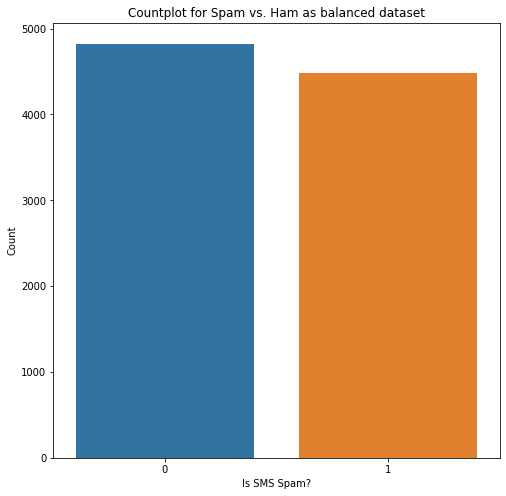

In [ ]:
# Countplot for Spam vs. Ham as balanced dataset
plt.figure(figsize=(8,8))
g = sns.countplot(x='label', data=df)
p = plt.title('Countplot for Spam vs. Ham as balanced dataset')
p = plt.xlabel('Is SMS Spam?')
p = plt.ylabel('Count')

In [ ]:
# Creating new feature word_count
df['word_count'] = df['message'].apply(lambda x: len(x.split()))

In [ ]:
df.head()

,label,message,word_count
0,0,"Go until jurong point, crazy.. Available only ...",20
1,0,Ok lar... Joking wif u oni...,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,0,U dun say so early hor... U c already then say...,11
4,0,"Nah I don't think he goes to usf, he lives aro...",13


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


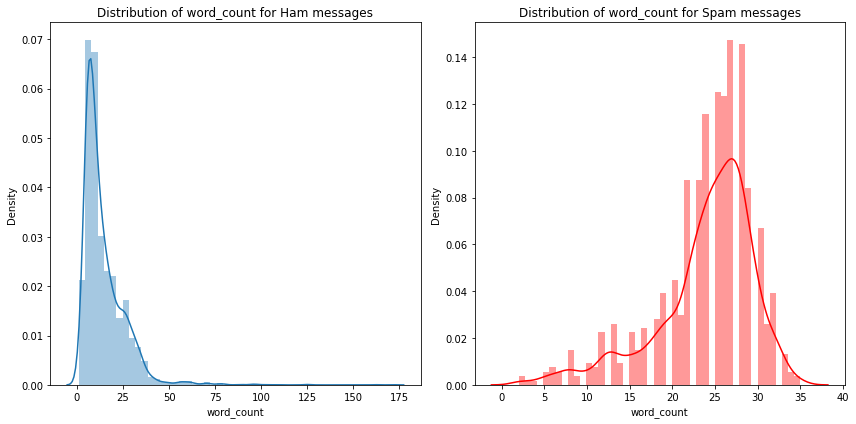

In [ ]:
plt.figure(figsize=(12, 6))

# 1-row, 2-column, go to the first subplot
plt.subplot(1, 2, 1)
g = sns.distplot(a=df[df['label']==0].word_count)
p = plt.title('Distribution of word_count for Ham messages')

# 1-row, 2-column, go to the second subplot
plt.subplot(1, 2, 2)
g = sns.distplot(a=df[df['label']==1].word_count, color='red')
p = plt.title('Distribution of word_count for Spam messages')

plt.tight_layout()
plt.show()

_**Insight:** **Spam messages** word_count fall in the range of **15-30 words**, whereas majority of the **Ham messages** fall in the range of **below 25 words**._

In [ ]:
# Creating feature contains_currency_symbol
def currency(x):
  currency_symbols = ['€', '$', '¥', '£', '₹']
  for i in currency_symbols:
    if i in x:
      return 1
  return 0

df['contains_currency_symbol'] = df['message'].apply(currency)

In [ ]:
df.tail()

,label,message,word_count,contains_currency_symbol
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0
5567,1,This is the 2nd time we have tried 2 contact u...,30,1


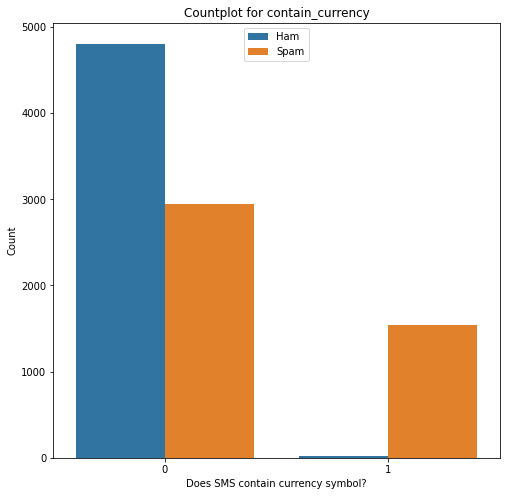

In [ ]:
# Countplot for contains_currency_symbol
plt.figure(figsize=(8,8))
g = sns.countplot(x='contains_currency_symbol', data=df, hue='label')
p = plt.title('Countplot for contain_currency')
p = plt.xlabel('Does SMS contain currency symbol?')
p = plt.ylabel('Count')
p = plt.legend(labels=['Ham', 'Spam'], loc=9)

_**Insight: Almost 1/3 of Spam messages contain currency symbols**, and currency symbols are **rarely used in Ham messages.**_

In [ ]:
# Creating feature contains_number
def numbers(x):
  for i in x:
    if ord(i)>=48 and ord(i)<=57:
      return 1
  return 0

df['contains_number'] = df['message'].apply(numbers)

In [ ]:
df.head()

,label,message,word_count,contains_currency_symbol,contains_number
0,0,"Go until jurong point, crazy.. Available only ...",20,0,0
1,0,Ok lar... Joking wif u oni...,6,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0,1
3,0,U dun say so early hor... U c already then say...,11,0,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0,0


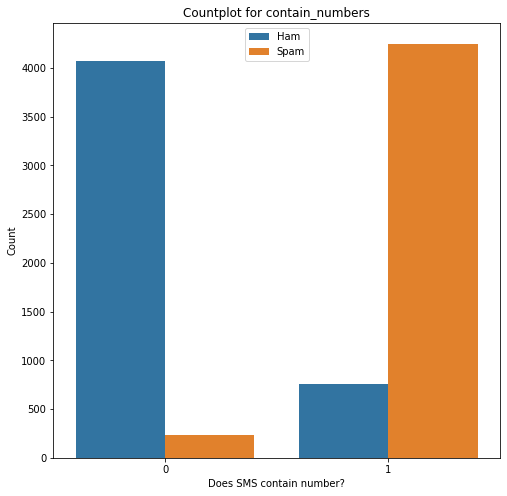

In [ ]:
# Countplot for contains_number
plt.figure(figsize=(8,8))
g = sns.countplot(x='contains_number', data=df, hue='label')
p = plt.title('Countplot for contain_numbers')
p = plt.xlabel('Does SMS contain number?')
p = plt.ylabel('Count')
p = plt.legend(labels=['Ham', 'Spam'], loc=9)

_**Insight:** It is evident that **most of the Spam messages contain numbers,** and **majority of the Ham messages donot contain numbers.**_

# **Data Cleaning**
* Removing special character and numbers using regular expression
* Converting the entire sms into lower case
* Tokenizing the sms by words
* Removing the stop words
* Lemmatizing the words
* Joining the lemmatized words
* Building a corpus of messages

In [ ]:
# Importing essential libraries for performing NLP
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
# Cleaning the messages
corpus = []
wnl = WordNetLemmatizer()

for sms_string in list(df.message):

  # Cleaning special character from the sms
  message = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sms_string)

  # Converting the entire sms into lower case
  message = message.lower()

  # Tokenizing the sms by words
  words = message.split()

  # Removing the stop words
  filtered_words = [word for word in words if word not in set(stopwords.words('english'))]

  # Removing noise from dataset
  check_and_replace(filtered_words)
  
  # Lemmatizing the words
  lemmatized_words = [wnl.lemmatize(word) for word in filtered_words]
  

  # Joining the lemmatized words
  message = ' '.join(lemmatized_words)

  # Building a corpus of messages
  corpus.append(message)

In [ ]:
corpus[0:3]

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply']

In [ ]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=500)
vectors = tfidf.fit_transform(corpus).toarray()
feature_names = tfidf.get_feature_names_out()

# Extracting independent and dependent variables from the dataset
X = pd.DataFrame(vectors, columns=feature_names)
y = df['label']

# **Model Building & Evaluation**
_**Metric: F1-Score**_

* Multinomial Naive Bayes: 0.943
* Decision Tree: 0.98
* **Random Forest (Ensemble): 0.995**
* Voting (Multinomial Naive Bayes + Decision Tree): 0.98


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
cv = cross_val_score(mnb, X, y, scoring='f1', cv=10)
print('--- Average F1-Score for MNB model: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average F1-Score for MNB model: 0.943 ---
Standard Deviation: 0.004


In [ ]:
# Classification report for MNB model
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)

print('--- Classification report for MNB model ---')
print(classification_report(y_test, y_pred))

--- Classification report for MNB model ---
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       959
           1       0.94      0.94      0.94       903

    accuracy                           0.94      1862
   macro avg       0.94      0.94      0.94      1862
weighted avg       0.94      0.94      0.94      1862



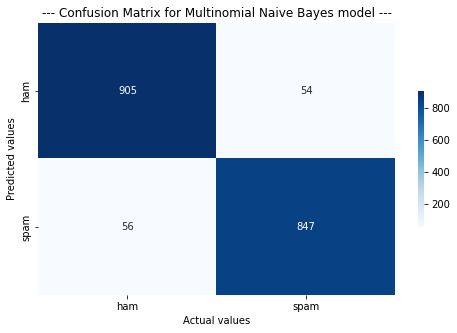

In [ ]:
# Confusion matrix of MNB model
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
axis_labels = ['ham', 'spam']
g = sns.heatmap(data=cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels, fmt='g', cbar_kws={"shrink": 0.5})
p = plt.xlabel('Actual values')
p = plt.ylabel('Predicted values')
p = plt.title('--- Confusion Matrix for Multinomial Naive Bayes model ---')

In [ ]:
# Fitting Random Forest to the Training set
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
cv = cross_val_score(dt, X, y, scoring='f1', cv=10)
print('--- Average F1-Score for Decision Tree model: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average F1-Score for Decision Tree model: 0.98 ---
Standard Deviation: 0.005


In [ ]:
# Classification report for Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print('--- Classification report for Decision Tree model ---')
print(classification_report(y_test, y_pred))

--- Classification report for Decision Tree model ---
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       959
           1       0.97      1.00      0.98       903

    accuracy                           0.98      1862
   macro avg       0.98      0.98      0.98      1862
weighted avg       0.98      0.98      0.98      1862



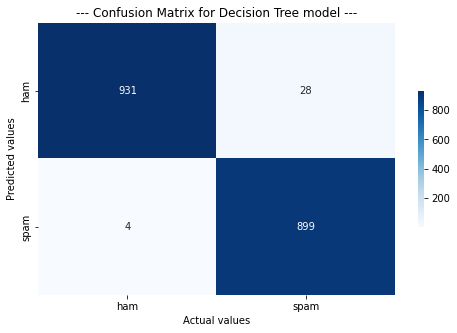

In [ ]:
# Confusion matrix of Decision Tree model
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
axis_labels = ['ham', 'spam']
g = sns.heatmap(data=cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels, fmt='g', cbar_kws={"shrink": 0.5})
p = plt.xlabel('Actual values')
p = plt.ylabel('Predicted values')
p = plt.title('--- Confusion Matrix for Decision Tree model ---')

In [ ]:
# Fitting Random Forest to the Training set
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10)
cv = cross_val_score(rf, X, y, scoring='f1', cv=10)
print('--- Average F1-Score for Random Forest model: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average F1-Score for Random Forest model: 0.994 ---
Standard Deviation: 0.003


In [ ]:
# Classification report for Random Forest model
rf = RandomForestClassifier(n_estimators=20)
rf.fit(X_train.values, y_train)
y_pred = rf.predict(X_test)

print('--- Classification report for Random Forest model ---')
print(classification_report(y_test, y_pred))

--- Classification report for Random Forest model ---
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       959
           1       0.99      1.00      0.99       903

    accuracy                           0.99      1862
   macro avg       0.99      0.99      0.99      1862
weighted avg       0.99      0.99      0.99      1862



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


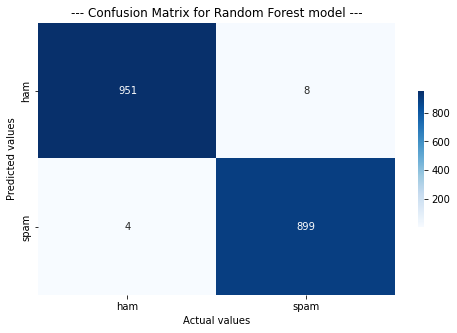

In [ ]:
# Confusion matrix of Random Forest model
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
axis_labels = ['ham', 'spam']
g = sns.heatmap(data=cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels, fmt='g', cbar_kws={"shrink": 0.5})
p = plt.xlabel('Actual values')
p = plt.ylabel('Predicted values')
p = plt.title('--- Confusion Matrix for Random Forest model ---')

_**Note:** Decision Tree & MNB algorithms are selected and fed to Voting algorithm to increase the F1-Score!_

In [ ]:
# Fitting Decision Tree and MNB to VotingClassifier
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier([('decision_tree', dt), ('m_naive_bayes', mnb)], weights=[2,1])
cv = cross_val_score(vc, X, y, cv=10, scoring='f1')

print('--- Average F1-Score for VotingClassifier model: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average F1-Score for VotingClassifier model: 0.98 ---
Standard Deviation: 0.005


_**Note:** Voting algorithm did not out-perform Random Forest algorithm, hence **Random Forest algorithm is selected for predicting the results of this problem statement.**_


# **Making Predictions**

In [ ]:
def predict_spam(sample_message):
  sample_message = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_message)
  sample_message = sample_message.lower()
  sample_message_words = sample_message.split()
  
  #removing noise from sample message
  check_and_replace(sample_message_words)

  sample_message_words = [word for word in sample_message_words if not word in set(stopwords.words('english'))]
  final_message = [wnl.lemmatize(word) for word in sample_message_words]
  final_message = ' '.join(final_message)

  temp = tfidf.transform([final_message]).toarray()
  return rf.predict(temp)

In [ ]:
sample_message = 'get credit score'

if predict_spam(sample_message):
  print('Gotcha! This is a SPAM message.')
else:
  print('This is a HAM (normal) message.')

Gotcha! This is a SPAM message.


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
sample_message = 'get cradit score'

if predict_spam(sample_message):
  print('Gotcha! This is a SPAM message.')
else:
  print('This is a HAM (normal) message.')

Gotcha! This is a SPAM message.


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  "X does not have valid feature names, but"
